# Feature Analysis and Preparation

This notebook focuses on analyzing and preparing features for machine learning model training. Below are the steps we will follow:

## Steps
1. **Exploratory Data Analysis (EDA)**
   - Understand feature distributions.
   - Check for missing values.
   - Visualize distributions of the features.

2. **Feature-to-Label Analysis**
   - Examine relationships between features and labels.
   - Use techniques like correlation analysis, random forest importance, and scatter plots.

3. **Feature-to-Feature Analysis**
   - Analyze relationships among features to detect redundancy or multicollinearity.
   - Use correlation matrices and Variance Inflation Factor (VIF).

4. **Feature Scaling**
   - Standardize or normalize features to ensure they are on a similar scale.

5. **Feature Selection**
   - Select features with high importance and minimal multicollinearity.
   - Drop irrelevant or redundant features.

6. **Feature Engineering**
   - Create new features from existing ones to capture more information.
   - Examples: rolling averages, differences, and ratios.

---

## Project Context
- **Goal**: Predict body movements using GPS and IMU data collected from an iPhone.
- **Dataset**: Combined data with GPS features, accelerometer, gyroscope, and orientation data, resampled to 1 Hz.
- **Labels**: Movement categories such as "Stop," "Moving Forward," "Turn Left," and "Turn Right."

---

Let’s get started!


## Step 0: Load Combined Data
Before starting the feature analysis, we reload the combined dataset created in the previous steps. This dataset includes GPS and IMU data, aggregated and resampled to 1 Hz, along with movement labels.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the combined dataset
combined_data = pd.read_csv('../data-collection/2024-12-10_22-37-46_Data/processed_features.csv')

# Display basic information about the dataset
print("Dataset Loaded Successfully.")
print(combined_data.head())

Dataset Loaded Successfully.
                 Timestamp       Label  Accel_X_mean  Accel_X_max  \
0  2024-12-10 22:37:47.999        Stop     -0.085682     2.628684   
1  2024-12-10 22:37:48.999        Stop     -6.300973     1.475182   
2  2024-12-10 22:37:49.999  Turn Right     -6.528521    -0.487386   
3  2024-12-10 22:37:50.999        Stop     -1.060218     1.097518   
4  2024-12-10 22:37:52.000        Stop     -1.753597    -0.991388   

   Accel_X_min  Accel_X_var  Accel_Y_mean  Accel_Y_max  Accel_Y_min  \
0    -1.385519     0.689624      0.674503     1.898801    -1.289419   
1   -18.506166    31.735673     -2.457685     3.904481    -6.301895   
2   -11.936029     6.617929     -6.325064    -0.461790   -11.821068   
3    -3.089276     0.583605    -10.009092    -6.735693   -21.012105   
4    -3.028802     0.149330     -9.609920    -9.115893    -9.887389   

   Accel_Y_var  ...    Roll_min    Roll_var  Pitch_mean  Pitch_max  Pitch_min  \
0     0.648827  ...  -51.027298   66.437643   -4

## Step 1: Exploratory Data Analysis (EDA)
In this step, we will:
- Understand feature distributions
- Check for missing values

In [2]:
# Check data types, shape, and missing values
print(combined_data.info())
print(combined_data.isnull().sum())

# Descriptive statistics
display(combined_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     425 non-null    object 
 1   Label         425 non-null    object 
 2   Accel_X_mean  425 non-null    float64
 3   Accel_X_max   425 non-null    float64
 4   Accel_X_min   425 non-null    float64
 5   Accel_X_var   425 non-null    float64
 6   Accel_Y_mean  425 non-null    float64
 7   Accel_Y_max   425 non-null    float64
 8   Accel_Y_min   425 non-null    float64
 9   Accel_Y_var   425 non-null    float64
 10  Accel_Z_mean  425 non-null    float64
 11  Accel_Z_max   425 non-null    float64
 12  Accel_Z_min   425 non-null    float64
 13  Accel_Z_var   425 non-null    float64
 14  Gyro_X_mean   425 non-null    float64
 15  Gyro_X_max    425 non-null    float64
 16  Gyro_X_min    425 non-null    float64
 17  Gyro_X_var    425 non-null    float64
 18  Gyro_Y_mean   425 non-null    

,Accel_X_mean,Accel_X_max,Accel_X_min,Accel_X_var,Accel_Y_mean,Accel_Y_max,Accel_Y_min,Accel_Y_var,Accel_Z_mean,Accel_Z_max,...,Roll_min,Roll_var,Pitch_mean,Pitch_max,Pitch_min,Pitch_var,Yaw_mean,Yaw_max,Yaw_min,Yaw_var
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,...,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,-0.812346,1.865391,-3.708297,2.173533,-9.618189,-6.210156,-14.247948,4.129041,-0.109634,2.442842,...,-100.113337,2234.169959,81.628385,84.097206,79.113350,9.338206,72.332307,104.050843,35.735328,1830.648991
std,0.694263,1.979196,4.068121,5.334018,1.247866,2.688389,4.397021,5.421375,1.161578,2.918693,...,85.270703,6025.588535,10.980842,9.084407,13.735791,46.732873,77.898025,74.289299,106.947364,5255.010649
min,-6.528521,-1.255439,-54.811219,0.001881,-10.535829,-9.750125,-37.355419,0.000476,-1.507970,-0.668061,...,-179.996879,0.067196,-39.329417,-28.235832,-52.146432,0.001112,-174.185006,-170.782828,-179.971682,0.061834
25%,-1.067305,0.878673,-4.121080,0.442993,-9.832351,-8.076006,-15.850389,0.648827,-0.553468,0.712818,...,-159.080017,15.509775,81.389064,83.438480,79.471351,0.169776,45.192954,98.534786,-6.138889,10.322820
50%,-0.833991,1.507365,-2.889292,0.974856,-9.763417,-6.487060,-13.467644,2.353894,-0.374419,1.518891,...,-126.828841,49.108107,83.760156,85.102523,82.290684,0.424424,101.710430,120.714624,83.878604,34.156405
75%,-0.401561,2.477199,-2.053130,1.905227,-9.690956,-5.080136,-11.534713,5.450345,-0.119320,2.933001,...,-77.248288,335.321449,85.345061,86.957198,84.096597,1.884112,120.981427,144.882340,111.290305,259.706876
max,1.510210,22.044059,0.356559,77.957455,5.769512,7.650591,4.191434,38.654976,9.584422,19.004480,...,171.845785,31160.971314,89.230535,89.970227,88.331920,776.120406,170.908642,179.976659,160.794466,29909.971443


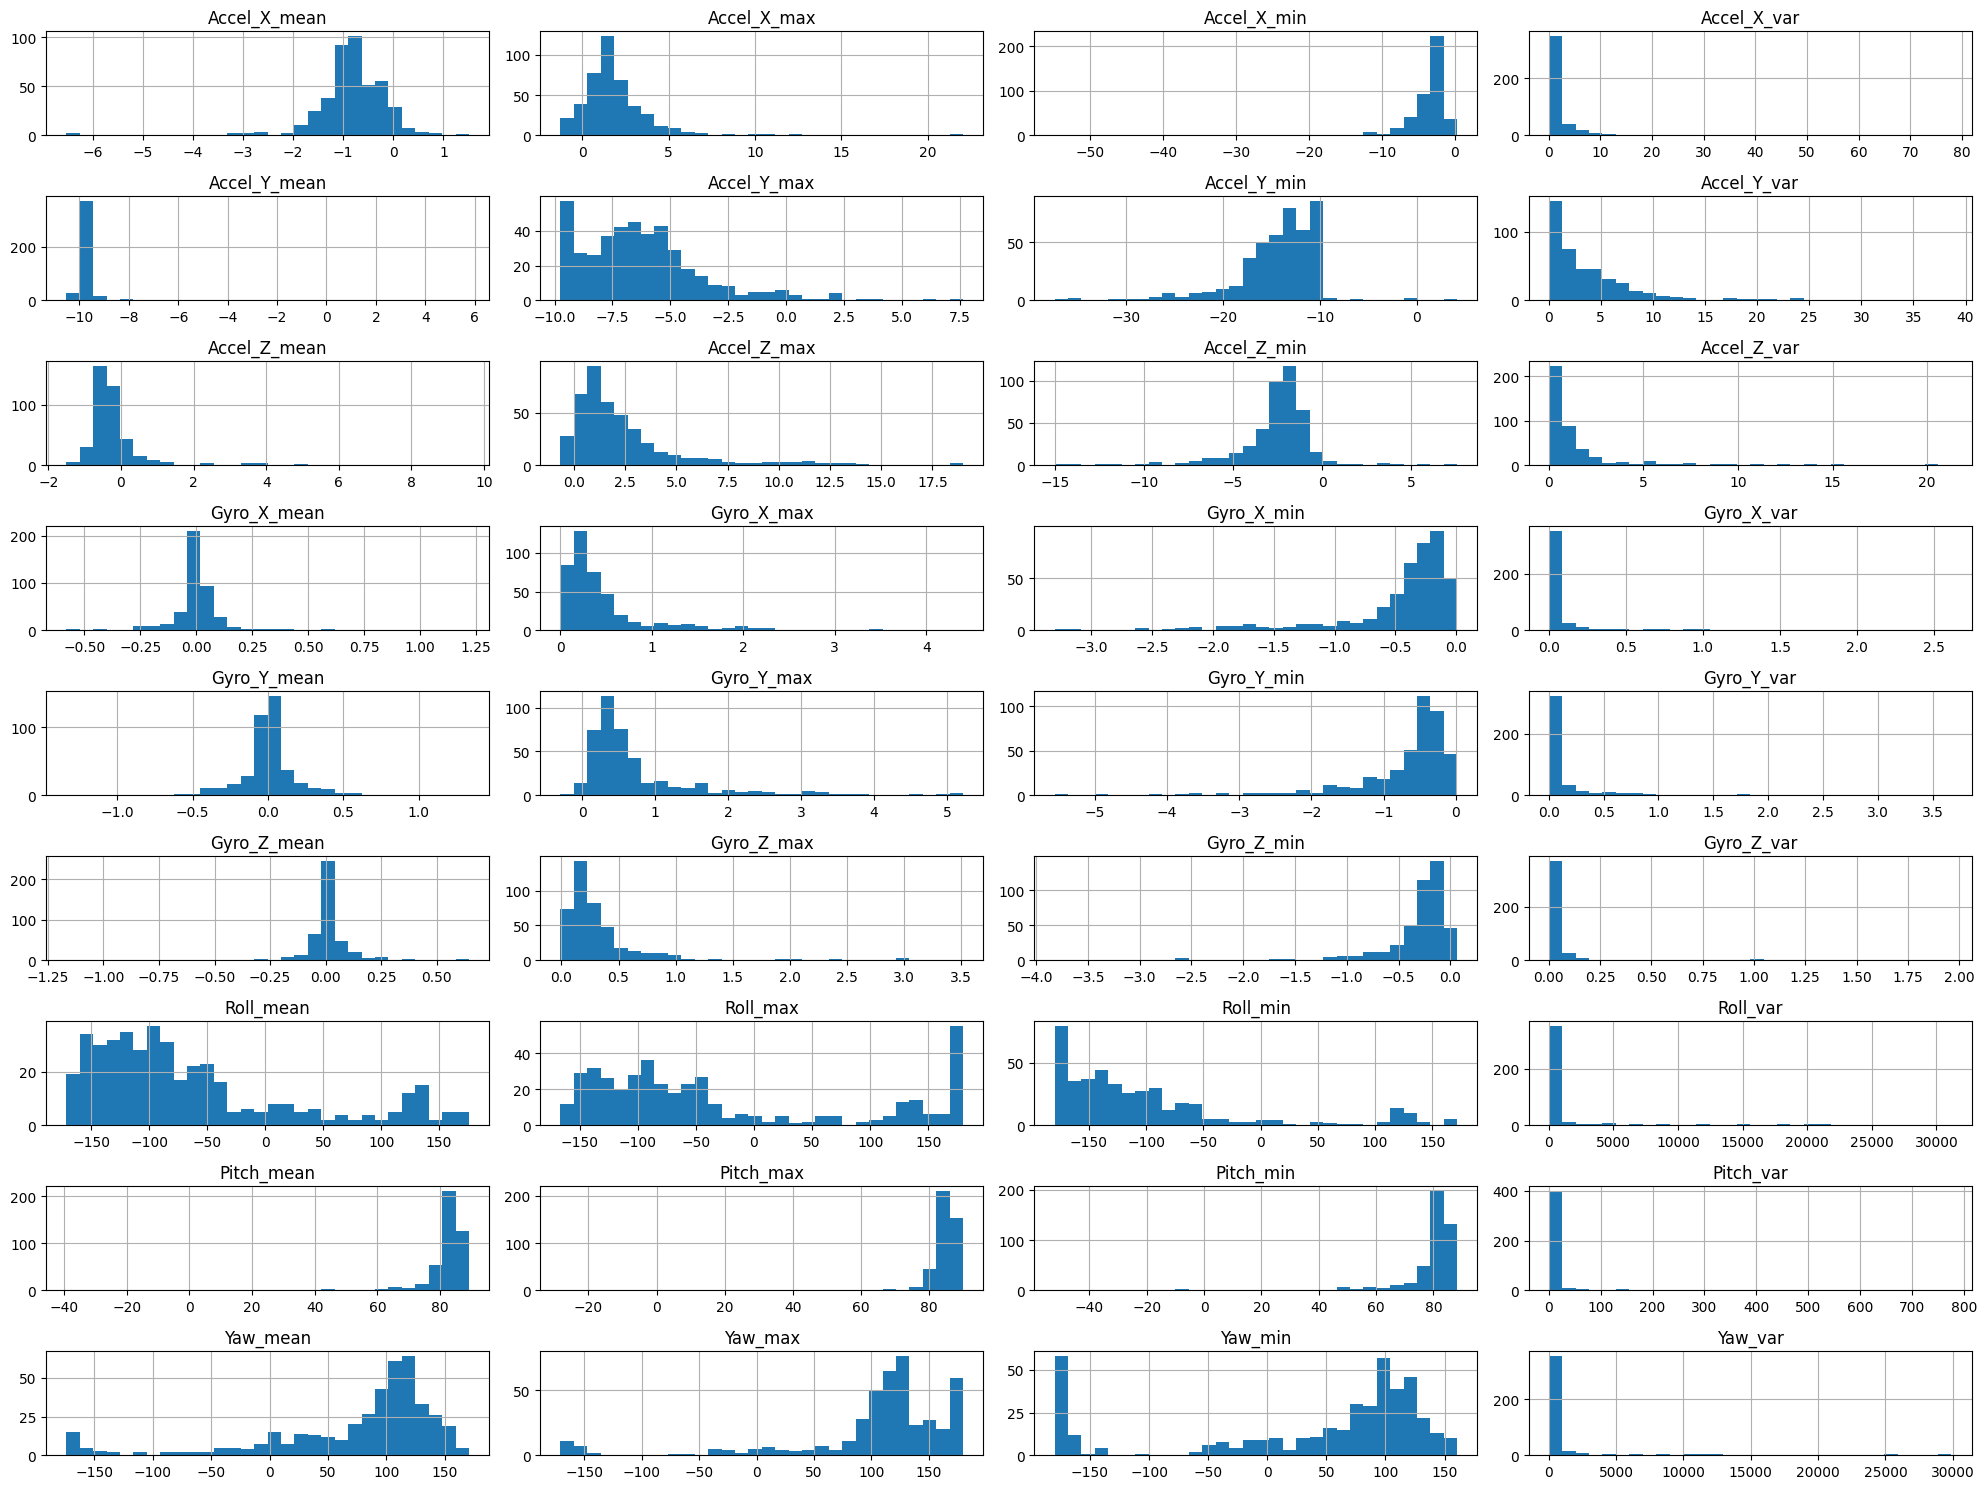

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions
combined_data.hist(figsize=(20, 15), bins=30, layout=(9, 4))
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

This section presents the distribution analysis of IMU sensor features to gain insight into their characteristics. Below are key observations for each feature category.

---

### **Accelerometer Features**
#### **Accel_X_mean, Accel_X_max, Accel_X_min, Accel_X_var**
- **Accel_X_mean**:
  - Centered around -2, suggesting a bias in the X-axis orientation.
  - Symmetrical distribution.
- **Accel_X_max, Accel_X_min**:
  - Wider range, with extremes from -30 to 20. Indicates occasional large spikes.
- **Accel_X_var**:
  - Most values clustered near 0, suggesting stable X-axis data with rare high variability.

#### **Accel_Y_mean, Accel_Y_max, Accel_Y_min, Accel_Y_var**
- **Accel_Y_mean**:
  - Centered near -10, suggesting consistent downward acceleration (gravity).
- **Accel_Y_max, Accel_Y_min**:
  - Spikes up to 10 and dips to -30. Highlights sudden movements or jerks in the Y-axis.
- **Accel_Y_var**:
  - Most values close to 0. Similar to X, the variability is low, with occasional peaks.

#### **Accel_Z_mean, Accel_Z_max, Accel_Z_min, Accel_Z_var**
- **Accel_Z_mean**:
  - Centered near 0, reflecting neutral or upward/downward movement balance.
- **Accel_Z_max, Accel_Z_min**:
  - Positive and negative extremes show varied spikes.
- **Accel_Z_var**:
  - Skewed, indicating rare instances of highly variable movement.

---

### **Gyroscope Features**
#### **Gyro_X_mean, Gyro_X_max, Gyro_X_min, Gyro_X_var**
- **Gyro_X_mean**:
  - Peaks near 0, with slight bias towards negative. Represents low rotational velocity around the X-axis.
- **Gyro_X_var**:
  - Generally low, with some peaks indicating occasional high rotational activity.

#### **Gyro_Y_mean, Gyro_Y_max, Gyro_Y_min, Gyro_Y_var**
- **Gyro_Y_mean**:
  - Centered around 0 with a slightly positive skew. Suggests mild rotation activity.
- **Gyro_Y_var**:
  - Low variance overall, implying minimal rotational fluctuation on the Y-axis.

#### **Gyro_Z_mean, Gyro_Z_max, Gyro_Z_min, Gyro_Z_var**
- **Gyro_Z_mean**:
  - Centered near 0. Indicates low rotational velocity about the Z-axis.
- **Gyro_Z_var**:
  - Few peaks show occasional rapid rotational movement.

---

### **Orientation Features**
#### **Roll_mean, Roll_max, Roll_min, Roll_var**
- **Roll_mean**:
  - Spans from -150 to 150, indicating significant orientation changes.
- **Roll_var**:
  - Variance shows most values near 0 but with a few extreme peaks.

#### **Pitch_mean, Pitch_max, Pitch_min, Pitch_var**
- **Pitch_mean**:
  - Centered around 0, but a long tail suggests potential upward/downward tilt.
- **Pitch_var**:
  - Some extreme spikes indicate significant changes in pitch orientation.

#### **Yaw_mean, Yaw_max, Yaw_min, Yaw_var**
- **Yaw_mean**:
  - Distributed widely across the range, suggesting substantial changes in heading direction.
- **Yaw_var**:
  - Most values are low, with occasional spikes showing high variability.

---

### **Key Takeaways**
1. **Accelerometer Data**:
   - Primarily stable with occasional high variability, especially in the Y-axis (gravity).
2. **Gyroscope Data**:
   - Generally low rotation activity with some occasional spikes in all axes.
3. **Orientation Data**:
   - Significant orientation changes observed, especially in the `Yaw` and `Roll` axes.
4. **Next Steps**:
   - These features will be further analyzed for correlation with movement labels (`Stop`, `Moving Forward`, etc.).
   - Potential outliers or extreme values will be handled during feature scaling and preparation.

---


## Step 2: Feature-to-Label Analysis
In this step, we will:
- Analyze the relationship between each feature and the label.
- Use correlation, feature importance (random forest), and scatter plots.

### Key Observations from Feature Correlation Heatmap

1. **Diagonal Values**:
   - The diagonal has values of 1 (dark red) because every feature is perfectly correlated with itself.

2. **High Positive Correlation (Red Areas)**:
   - Features like `Accel_X_max`, `Accel_X_min`, and `Accel_X_var` show strong correlations as they are derived from the same sensor data.
   - Similarly, features such as `Gyro_Y_mean` and `Gyro_Y_var` exhibit strong correlations.

3. **High Negative Correlation (Blue Areas)**:
   - Strong negative correlations indicate an inverse relationship between features. For instance, `Pitch_mean` and some other features have noticeable negative correlations.

4. **Low or No Correlation (Light Areas)**:
   - Features such as `latitude` and `speed` show weak or no correlation with other features, suggesting independence or less relevance.

---

### Next Steps Based on Observations

1. **Identify Redundant Features**:
   - Highly correlated features (e.g., > 0.8 correlation) might be redundant. Consider retaining only one to reduce overfitting.

2. **Feature Importance with Respect to Labels**:
   - Analyze correlations of features with the `Label` column. Features with strong correlations may be more important for prediction.

3. **Variance Inflation Factor (VIF)**:
   - Perform VIF analysis to identify and address multicollinearity.

4. **Feature Engineering**:
   - If two features are highly correlated but have distinct predictive powers, consider engineering new features (e.g., ratios or differences).


         Feature  Importance
6    Accel_Y_min    0.083032
7    Accel_Y_var    0.079194
5    Accel_Y_max    0.073052
24     Roll_mean    0.052121
25      Roll_max    0.041091
34       Yaw_min    0.037178
29     Pitch_max    0.036598
28    Pitch_mean    0.032434
26      Roll_min    0.032288
12   Gyro_X_mean    0.031671
30     Pitch_min    0.027788
9    Accel_Z_max    0.026494
14    Gyro_X_min    0.025753
16   Gyro_Y_mean    0.025104
33       Yaw_max    0.024744
20   Gyro_Z_mean    0.024320
32      Yaw_mean    0.024034
8   Accel_Z_mean    0.023693
31     Pitch_var    0.023069
35       Yaw_var    0.021998
11   Accel_Z_var    0.021892
3    Accel_X_var    0.021764
0   Accel_X_mean    0.020398
23    Gyro_Z_var    0.020393
15    Gyro_X_var    0.018582
22    Gyro_Z_min    0.016459
1    Accel_X_max    0.016140
17    Gyro_Y_max    0.015477
21    Gyro_Z_max    0.014932
2    Accel_X_min    0.014827
13    Gyro_X_max    0.014484
10   Accel_Z_min    0.013924
4   Accel_Y_mean    0.013202
18    Gyro_Y_m

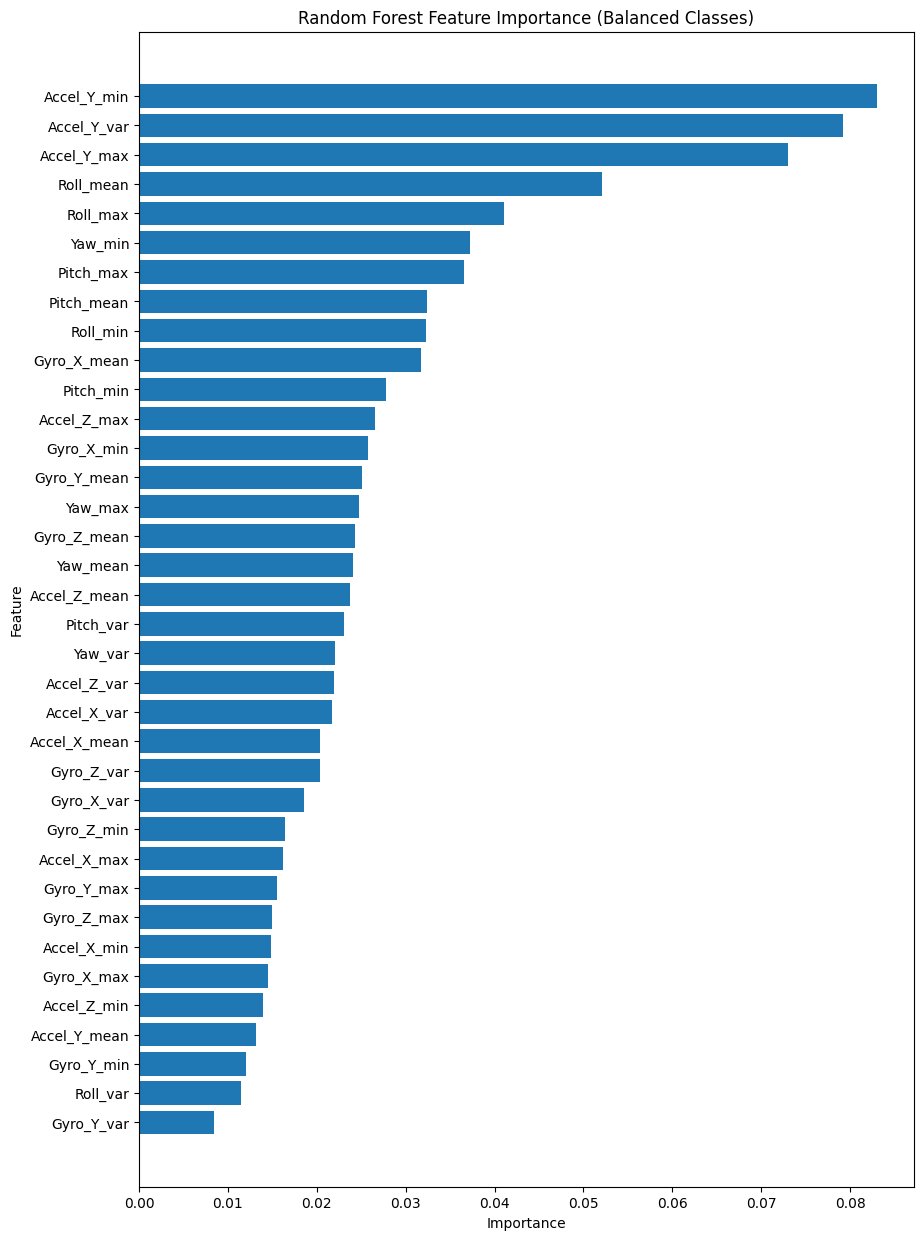

In [4]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Drop non-numeric columns
X = combined_data.drop(['Timestamp', 'Label'], axis=1)
y = combined_data['Label']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# To map back numeric labels to their original categories:
# print(dict(enumerate(label_encoder.classes_)))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the random forest classifier with class weighting
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 15))  # Adjust the figure size (width, height)
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance (Balanced Classes)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


### Random Forest Feature Importance

- Random Forest was used to evaluate the importance of each feature in predicting the movement labels (`Label`).
- **Key Findings**:
  1. `course_diff` and `speed` dominate the rankings, indicating that derived features are highly predictive.
  2. IMU features like `Accel_Y_*` and orientation features like `Roll_*` also play a significant role in identifying movements like "Turn Left" and "Turn Right."
  3. Positional features (e.g., `latitude`, `longitude`, `course`) are important but are not as dominant as `course_diff`.


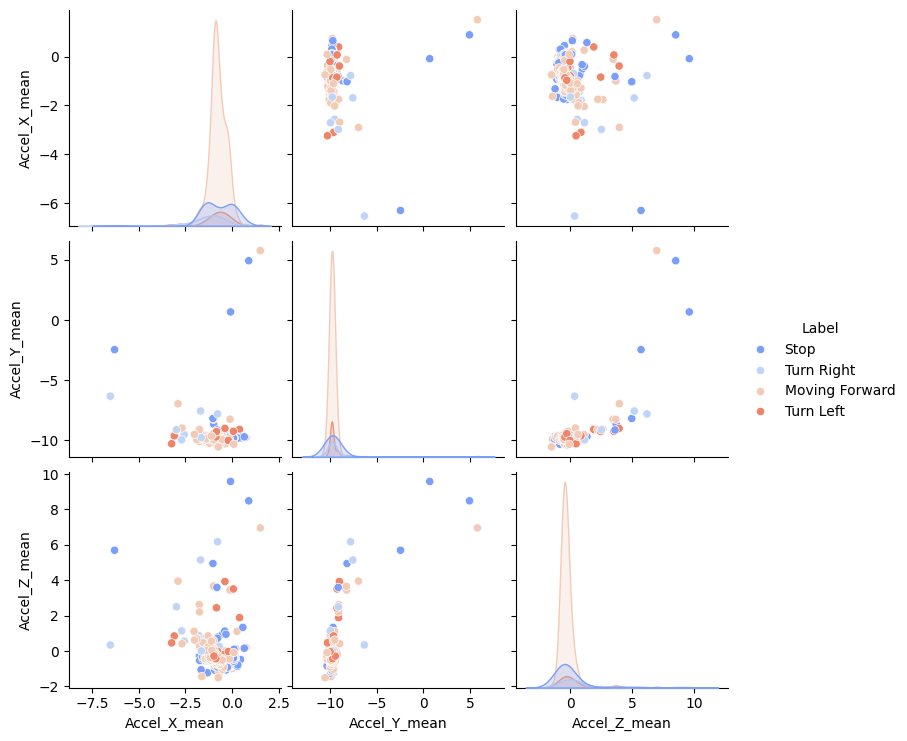

In [5]:
# Scatter plots of selected features vs label
sns.pairplot(combined_data, vars=['Accel_X_mean', 'Accel_Y_mean', 'Accel_Z_mean'], hue='Label', palette='coolwarm')
plt.show()

## Step 2: Feature-to-Label Analysis

### 1. Random Forest Feature Importance
The Random Forest model was used to calculate feature importance, ranking features based on their contribution to label prediction.

#### Top Features:
1. **`Accel_Y_min`**:
   - Strongly impacts the model, highlighting the importance of minimum Y-axis acceleration in identifying labels.
2. **`Accel_Y_var` and `Accel_Y_max`**:
   - Variation and maximum Y-axis acceleration play key roles in distinguishing between movement labels.
3. **`Roll_mean` and `Roll_max`**:
   - Rotational motion (roll) features are essential, especially for turn-based labels (`Turn Left`, `Turn Right`).
4. **`Yaw_min` and `Pitch_max`**:
   - Angular features significantly contribute to classifying different movement patterns.

#### Lower Importance Features:
- Features like `Gyro_Y_var`, `Gyro_Z_min`, and `Accel_X_min` showed minimal importance, suggesting they could be candidates for removal or transformation.

---

### 2. Pair Plot Analysis
Pair plots were used to visualize feature distributions and their relationships across the labels (`Stop`, `Turn Right`, `Moving Forward`, `Turn Left`).

#### Observations:
- **Label Separation:**
  - Features like `Accel_Y_mean` and `Accel_Y_var` show clear separations for labels such as `Moving Forward` and `Stop`.
  - Angular features (`Pitch_max` and `Yaw_min`) play a vital role in distinguishing between turn-based labels (`Turn Right` and `Turn Left`).
- **Feature Relationships:**
  - Overlapping clusters were observed in some regions, particularly between `Turn Right` and `Turn Left`, indicating potential improvement areas for feature engineering.

---

### Summary:
#### Key Insights:
- **Important Features:**
  - Prioritize `Accel_Y_*`, `Roll_*`, `Pitch_*`, and `Yaw_*` features during model training.
- **Redundant Features:**
  - Consider removing or transforming features with low importance or high redundancy (e.g., `Gyro_Y_var`, `Accel_X_min`).
- **Label Overlap:**
  - Enhance feature engineering to improve label separability for overlapping classes, such as `Turn Right` and `Turn Left`.

#### Next Steps:
1. **Feature Selection:**
   - Retain important features and remove redundant ones based on Random Forest importance and correlation analysis.
2. **Validation:**
   - Validate feature selection using cross-validation to ensure generalizability.
3. **Feature Engineering:**
   - Explore derived features (e.g., acceleration magnitudes, angular velocities) to improve label separation.



## Step 3: Feature-to-Feature Analysis
In this step, we will:
- Analyze relationships between features to detect redundancy.
- Use correlation matrices and Variance Inflation Factor (VIF).

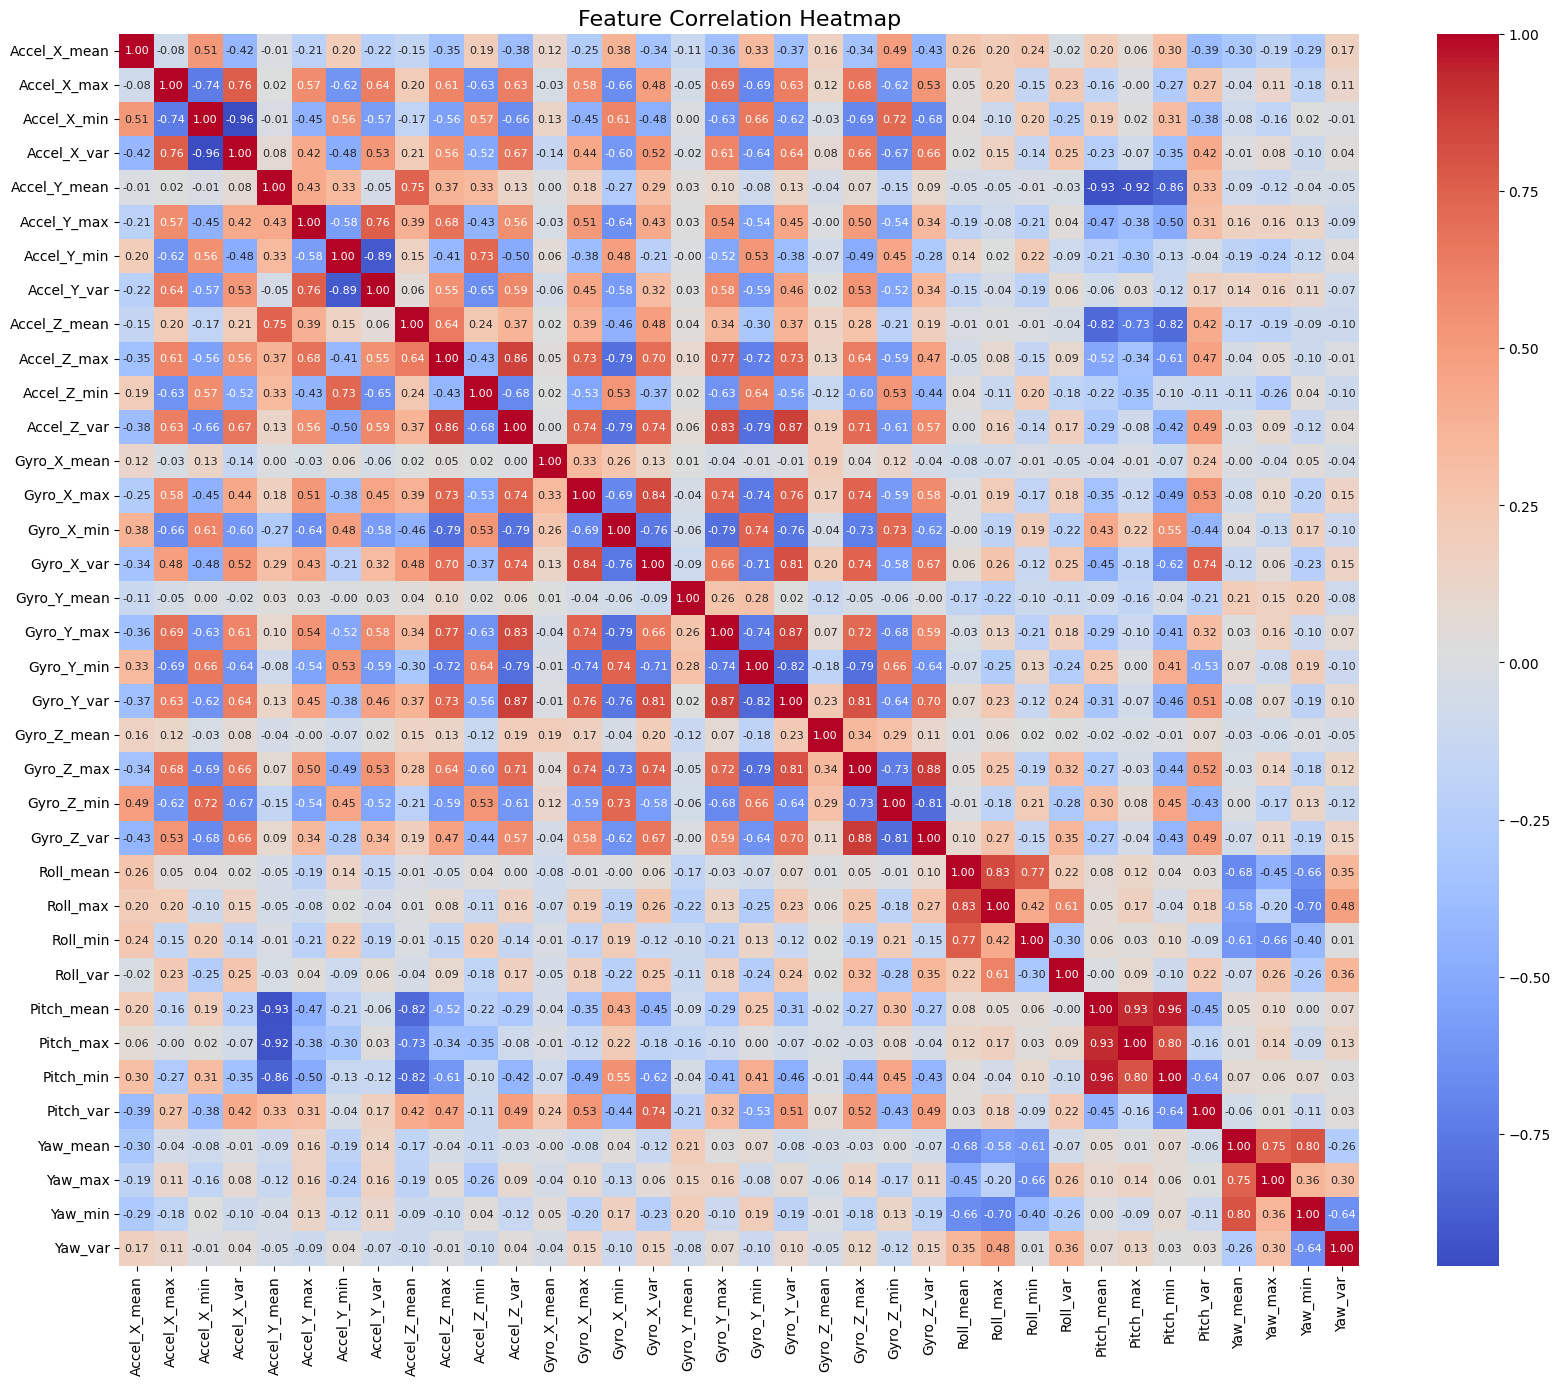

In [6]:
# Drop non-numeric columns
numeric_data = combined_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix
# Visualize correlation matrix
plt.figure(figsize=(20, 16))  # Increase the figure size for better visibility
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    annot_kws={"size": 8},  # Reduce annotation font size
    cmap='coolwarm', 
    fmt=".2f"  # Limit to 2 decimal places for clarity
)
plt.title("Feature Correlation Heatmap", fontsize=16)  # Increase title font size
plt.show()



In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

         Feature          VIF
0   Accel_X_mean     9.450384
1    Accel_X_max    15.895298
2    Accel_X_min    48.047809
3    Accel_X_var    32.211085
4   Accel_Y_mean  1420.036157
5    Accel_Y_max    49.959462
6    Accel_Y_min   132.591212
7    Accel_Y_var    17.838289
8   Accel_Z_mean     6.116975
9    Accel_Z_max    24.315514
10   Accel_Z_min    21.274456
11   Accel_Z_var    26.705814
12   Gyro_X_mean     3.206099
13    Gyro_X_max    19.766391
14    Gyro_X_min    20.461135
15    Gyro_X_var    19.787230
16   Gyro_Y_mean     3.040422
17    Gyro_Y_max    25.260423
18    Gyro_Y_min    17.470115
19    Gyro_Y_var    20.695998
20   Gyro_Z_mean     5.163655
21    Gyro_Z_max    38.635654
22    Gyro_Z_min    22.997061
23    Gyro_Z_var    17.230916
24     Roll_mean    18.660575
25      Roll_max    15.349970
26      Roll_min    18.518524
27      Roll_var     6.109027
28    Pitch_mean  8631.230521
29     Pitch_max  2760.616007
30     Pitch_min  4758.628792
31     Pitch_var    14.443506
32      Ya

### Step 3: Feature-to-Feature Analysis
#### Feature Correlation Heatmap

A feature correlation heatmap was created to visualize the pairwise correlations between all features. This helps in identifying features that are highly correlated with each other, which can lead to redundancy and multicollinearity issues.

#### Observations:
1. **High Positive Correlations:**
   - `Accel_X_max` and `Accel_X_min` show a high positive correlation (~0.90). This indicates these features may contain redundant information.
   - `Pitch_mean`, `Pitch_max`, and `Pitch_min` are highly correlated with each other (>0.90). These features are strong candidates for dimensionality reduction or removal.

2. **High Negative Correlations:**
   - `Accel_X_var` and `Accel_X_min` have a strong negative correlation (-0.87). This suggests they might provide opposing but related information.
   - `Yaw_min` and `Yaw_max` are moderately negatively correlated, which aligns with the directional nature of yaw movement.

3. **Clusters of Correlated Features:**
   - Features derived from the same sensor (e.g., `Accel_X_mean`, `Accel_X_max`, `Accel_X_var`) tend to cluster together with high correlations. This is expected but reinforces the need to reduce redundancy.

4. **Minimal Correlation:**
   - Some features like `Gyro_X_mean` and `Accel_Z_mean` show minimal correlation with others, suggesting they may provide unique information.

#### Actions Taken:
1. Features with very high correlations (>0.85) will be evaluated for removal or dimensionality reduction.
   - Example: Instead of keeping `Pitch_mean`, `Pitch_max`, and `Pitch_min`, we may create a composite feature or use dimensionality reduction (e.g., PCA).
2. Features with minimal correlations are retained as they may provide complementary information.

#### Conclusion:
The heatmap highlights redundant features that can be removed or transformed to reduce multicollinearity. This step ensures the dataset is optimized for modeling.


#### Variance Inflation Factor (VIF) Analysis

Variance Inflation Factor (VIF) was computed to identify multicollinearity among the features. High VIF values indicate that a feature is highly correlated with other features, potentially causing instability in the model.

#### Observations:
1. Features with **very high VIF (>1000)**:
   - `Pitch_mean` (8631.23)
   - `Pitch_max` (2760.62)
   - `Pitch_min` (4758.63)
   - `Accel_Y_mean` (1420.04)
   - These features exhibit severe multicollinearity and are likely redundant.

2. Features with **moderate VIF (5–10)**:
   - Examples include `Accel_X_mean` (9.45), `Yaw_min` (9.58), and `Yaw_var` (5.20). These features may still contribute to the model but could be reconsidered based on their importance.

3. Features with **acceptable VIF (<5)**:
   - Examples include `Gyro_X_mean`, `Gyro_Y_mean`, and `Gyro_Z_mean`. These features show minimal correlation with others and are likely useful for modeling.

#### Actions Taken:
- Features with extremely high VIF values were flagged for removal or transformation.
- Dimensionality reduction techniques (e.g., PCA) will be considered for highly correlated features.
- After feature adjustments, VIF will be recalculated to ensure minimal multicollinearity.

#### Conclusion:
Addressing multicollinearity helps improve model stability and interpretability, ensuring better performance during training and prediction.


## Step 4: Feature Scaling
In this step, we will:
- Scale features to ensure uniformity for models sensitive to feature magnitude.
- Apply standardization or normalization.

#### Why Feature Scaling May Be Needed:
- **Tree-Based Models (e.g., Random Forest, Gradient Boosting)**: 
  - Tree-based models are inherently **scale-invariant**. Feature scaling has no impact on their performance or accuracy because they split data based on feature thresholds, not distances or gradients.
  - **Scaling is not strictly required** for these models.
- **Gradient-Based Models (e.g., Logistic Regression, Neural Networks)**:
  - Gradient-based models are sensitive to feature scaling because large feature values can disproportionately affect gradient updates.
  - **Scaling is essential** to improve convergence and prevent bias toward larger features.
- **Distance-Based Models (e.g., k-NN, SVM)**:
  - Distance-based models rely on Euclidean or Manhattan distances. Without scaling, features with larger numerical ranges dominate the computation, leading to biased results.
  - **Scaling is mandatory** for these models to ensure unbiased distance calculations.

#### Decision for This Dataset:
- Although tree-based models (e.g., Random Forest, Gradient Boosting) do not require scaling, applying **feature scaling** prepares the dataset for other models (e.g., SVM, k-NN, Logistic Regression).
- Scaling ensures flexibility to experiment with a variety of machine learning algorithms without revisiting preprocessing steps.
- Scaling does **not negatively affect** tree-based models, so it is safe to apply.

#### Conclusion:
- **Feature scaling is implemented** to ensure the dataset is compatible with all types of machine learning models. This proactive step ensures no limitations when experimenting with models like SVM, Logistic Regression, or k-NN in the future.


In [8]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = combined_data.drop(['Timestamp', 'Label'], axis=1)
y = combined_data['Label']

# Apply StandardScaler to scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optionally: Convert back to DataFrame for better interpretability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Feature scaling completed.")


Feature scaling completed.


## Step 5: Feature Selection
In this step, we will:
- Select features based on their importance and multicollinearity.
- Drop redundant or less important features.

### Overview
Feature selection was conducted based on the results from:
1. **Step 2: Feature-to-Label Analysis** - Identified feature importance using Random Forest and correlation with the label.
2. **Step 3: Feature-to-Feature Analysis** - Removed redundant and highly correlated features using the correlation heatmap and Variance Inflation Factor (VIF).

### Process
- **Low Importance Features Removed**:
  - `Gyro_Y_var`, `Roll_var`, `Gyro_Y_min`, `Accel_X_mean`, `Accel_X_max`
- **Redundant Features Removed**:
  - `Accel_X_min`, `Accel_Y_mean`, `Accel_Y_max`
  - `Pitch_mean`, `Pitch_min`, `Gyro_Z_min`
- **Features with High VIF Removed**:
  - `Accel_Y_mean`, `Pitch_mean`, `Pitch_min`

### Final Selected Features
The following features were selected for model training:
- **Accelerometer Features**:
  - `Accel_Y_min`, `Accel_Y_var`, `Accel_Z_mean`, `Accel_Z_max`, `Accel_Z_var`
- **Gyroscope Features**:
  - `Gyro_X_mean`, `Gyro_X_var`, `Gyro_Y_mean`, `Gyro_Z_var`
- **Roll Features**:
  - `Roll_mean`, `Roll_max`
- **Pitch Features**:
  - `Pitch_max`
- **Yaw Features**:
  - `Yaw_mean`, `Yaw_min`


In [9]:
# Define the final selected features
selected_features = [
    'Accel_Y_min', 'Accel_Y_var', 'Accel_Z_mean', 'Accel_Z_max', 'Accel_Z_var',
    'Gyro_X_mean', 'Gyro_X_var', 'Gyro_Y_mean', 'Gyro_Z_var',
    'Roll_mean', 'Roll_max',
    'Pitch_max',
    'Yaw_mean', 'Yaw_min'
]

# Create the dataset with selected features
X_selected = combined_data[selected_features]
y = combined_data['Label']  # Target variable

print("Selected Features:")
print(selected_features)

Selected Features:
['Accel_Y_min', 'Accel_Y_var', 'Accel_Z_mean', 'Accel_Z_max', 'Accel_Z_var', 'Gyro_X_mean', 'Gyro_X_var', 'Gyro_Y_mean', 'Gyro_Z_var', 'Roll_mean', 'Roll_max', 'Pitch_max', 'Yaw_mean', 'Yaw_min']


## Step 6: Feature Engineering
In this step, we will:
- Create new features from existing ones if applicable.
- Examples: rolling averages, differences, or ratios.

### Transformations Applied
Based on exploratory analysis, the following transformations were applied to improve feature representation:

1. **Magnitude Features**:
   - `Accel_magnitude`: Combined magnitude of accelerometer axes.
   - `Gyro_magnitude`: Combined magnitude of gyroscope axes.

2. **Rolling Aggregations**:
   - Rolling mean and variance over a 3-second window for selected features.

3. **Log Transformation**:
   - Applied log transformation to skewed features like `Yaw_var` and `Pitch_var`.

In [10]:
import numpy as np
import pandas as pd

# Magnitude Features
combined_data['Accel_magnitude'] = np.sqrt(
    combined_data['Accel_X_mean']**2 + 
    combined_data['Accel_Y_mean']**2 + 
    combined_data['Accel_Z_mean']**2
)
combined_data['Gyro_magnitude'] = np.sqrt(
    combined_data['Gyro_X_mean']**2 + 
    combined_data['Gyro_Y_mean']**2 + 
    combined_data['Gyro_Z_mean']**2
)

# Rolling Aggregations (3-second window)
combined_data['Accel_Y_rolling_mean'] = combined_data['Accel_Y_mean'].rolling(window=3).mean()
combined_data['Gyro_X_rolling_var'] = combined_data['Gyro_X_mean'].rolling(window=3).var()

# Log Transformation
combined_data['Yaw_var_log'] = np.log1p(combined_data['Yaw_var'])
combined_data['Pitch_var_log'] = np.log1p(combined_data['Pitch_var'])


## Step 7: Save Transformed Data

### Final Dataset
- **Features Included**:
  - `Accel_magnitude`
  - `Gyro_magnitude`
  - `Accel_Y_rolling_mean`
  - `Gyro_X_rolling_var`
  - `Yaw_var_log`
  - `Pitch_var_log`
- **Label**: The target column (`Label`) was added to the dataset for supervised learning.

### Saving Process
The final dataset was saved as `processed_data.csv` to serve as the input for model training and evaluation.


In [11]:
# Combine selected features and engineered features
selected_features = [
    'Accel_magnitude', 'Gyro_magnitude', 'Accel_Y_rolling_mean',
    'Gyro_X_rolling_var', 'Yaw_var_log', 'Pitch_var_log',  # Original selection
    'Accel_X_mean', 'Gyro_Y_mean', 'Roll_mean',  # High importance from RF analysis
    'Pitch_mean', 'Yaw_var', 'Accel_Y_var'  # Additional candidates
]

X_transformed = combined_data[selected_features]

# Add labels to the dataset
final_dataset = X_transformed.copy()
final_dataset['Label'] = y  # Ensure y is the correct label column

# Save the processed data
final_dataset.to_csv('../data-collection/2024-12-10_22-37-46_Data/processed_data.csv', index=False)  # Save as CSV
print("Processed data saved as 'processed_data.csv'")


Processed data saved as 'processed_data.csv'
